In [1]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
import torch
import numpy as np

## 创建数据集
使用线性模型参数w = $[2, -3.4]^T$、b=4.2

In [22]:
def synthetic_data(w, b, num_examle):
    """
    生成y=wx+b+噪声
    """
    x = torch.normal(0, 1, (num_examle, len(w)))
    y = torch.matmul(x, w) + b
    y += torch.normal(0, 0.01, y.shape)    # 添加均值为0，方差为0.01的噪音
    return x, y.reshape((-1, 1))

In [3]:
print('features:', features[0], '\n label:', labels[0])

features: tensor([-0.3079,  0.2358]) 
 label: tensor([2.8433])


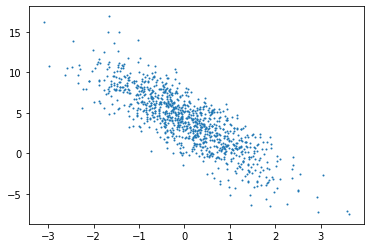

In [4]:
plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);

定义data_iter函数，该函数接收批量大小、特征矩阵和标签向量为作为输入，生成大小为batch_size的小批量

In [5]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples)) # 生成小批量的index
    random.shuffle(indices) # 将下标打乱，可用随机顺序来访问样本
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])    # 防止超过索引
        yield features[batch_indices], labels[batch_indices]

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break


tensor([[-0.5694,  0.2960],
        [-0.9651,  0.8646],
        [ 0.3479, -0.4598],
        [-0.3394, -0.8874],
        [-0.3768, -1.6230],
        [-1.1260,  0.2332],
        [-0.2235, -0.3810],
        [ 0.2854,  0.0920],
        [ 0.5588, -1.3355],
        [-0.6614, -0.0296]]) 
 tensor([[ 2.1212],
        [-0.4610],
        [ 6.3204],
        [ 6.3328],
        [ 8.5478],
        [ 1.2226],
        [ 4.9452],
        [ 4.4722],
        [ 9.5075],
        [ 2.9795]])


定义初始化模型参数

In [6]:
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [7]:
def linreg(X, w, b):
    return torch.matmul(X, w)+b

In [8]:
# 定义损失函数
def squared_loss(y_hat, y):
    """均方损失"""
    return(y_hat - y.reshape(y_hat.shape))**2 / 2

定义优化算法

In [17]:
def sgd(params, lr, batch_size):
    """小批量随机梯度下降"""
    with torch.no_grad():   # 更新的时候并不需要计算梯度
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [21]:
from random import triangular


lr = 0.001
num_epochs = 3  # 对数据扫描3次
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        # l的形状是(batch_size, 1), 不是一个标量
        l.sum().backward()
        sgd([w, b], lr, batch_size) # 使用参数的梯度更新参数
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}') 

epoch 1, loss 0.000048
epoch 2, loss 0.000048
epoch 3, loss 0.000048
